# IMPORTER LES LIBRAIRIES

In [122]:
import os
import numpy as np
import pandas as pd
import seaborn as sns



import matplotlib.pyplot as plt

# IMPORTER LES DONNÉES

In [123]:
# Lire les fichiers csv et les inserer dans des DataFrame
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

In [124]:
# Afficher les premières lignes du DataFrame
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
# Afficher les infos statistiques du DataFrame
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
# Afficher les infos du DataFrame
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 1. ANALYSE CATÉGORIELLE

## A) UNIVARIATE ANALYSIS
Analyse d'une variable => Target Variable : 'Survived'

### a) AVEC UNE FONCTION categorical_summarized

In [127]:
from scipy import stats
from scipy.stats import norm

# Fonction pour sortir les données statistiques
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, order=None, verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe,
                  palette=palette, order=order, ax=ax)
plt.show()

In [128]:
# Définir la palette d'affichage du graph
c_palette = ['tab:blue', 'tab:orange']

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
mode:  0    0
dtype: int64
0    549
1    342
Name: Survived, dtype: int64


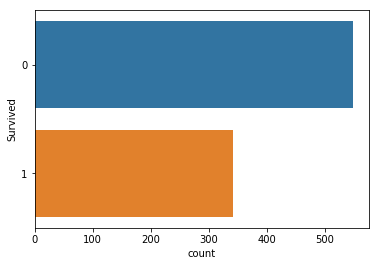

In [129]:
# Afficher la fonction 'categorical_summarized'
categorical_summarized(train_df, y = 'Survived', palette=c_palette)

### b) SANS LA FONCTION categorical_summarized (Step by step)


---------------- Describe -----------------

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

------------------ Mode -------------------

mode:  0    0
dtype: int64

------------- Valeurs totales -------------

nombre de valeurs totales :  891

--------------- Distribution --------------

0    549
1    342
Name: Survived, dtype: int64

------------- % Distribution --------------

0    0.616162
1    0.383838
Name: Survived, dtype: float64

-------- Distribution de 'Survived' -------



Text(0.5,1,"Distribution de 'Survived'")

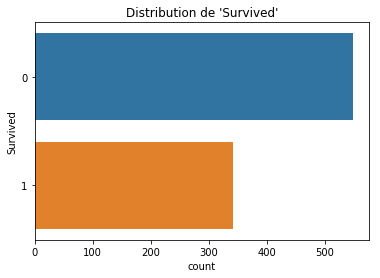

In [130]:
##########################################################
########################     1     #######################
##########################################################
# Afficher les infos statistiques de la colonne 'Survived'
print("\n---------------- Describe -----------------\n")
print (train_df['Sex'].describe())

##########################################################
########################     2     #######################
##########################################################
# Retourner la valeur la plus présente dans chaque colonnes
# Dans ce cas c'est 0 (Survived )
print("\n------------------ Mode -------------------\n")
print ('mode: ', train_df['Survived'].mode())

##########################################################
########################     3     #######################
##########################################################
# Afficher le nombre de valeurs totales de la colonne "Survived"
print("\n------------- Valeurs totales -------------\n")
print ('nombre de valeurs totales : ', train_df['Survived'].count())

##########################################################
########################     4     #######################
##########################################################
# Afficher la distribution de la colonne "Survived"
print("\n--------------- Distribution --------------\n")
print (train_df['Survived'].value_counts())

##########################################################
########################     5     #######################
##########################################################
# Afficher le % de la distribution dans la colonne "Survived" par rapport au nombre total de ligne
# len() affiche toutes les valeurs
print("\n------------- % Distribution --------------\n")
print (train_df['Survived'].value_counts()/len(train_df))

# Définir la palette d'affichage du graph
c_palette = ['tab:blue', 'tab:orange']

##########################################################
########################     6     #######################
##########################################################
# Afficher le graph des données de la colonne 'Survived'
# Affichage défini sur y
# Pour un affichage sur x => x = 'Survived'
print("\n-------- Distribution de 'Survived' -------\n")
sns.countplot(y='Survived', data=train_df,
                  palette=c_palette)
plt.title("Distribution de 'Survived'")

## B) BIVARIATE ANALYSIS
Simultaneous analysis of two variables (attributes) => Target Variable : 'Sex' en fonction de 'Survived'

### a) AVEC LA FONCTION categorical_summarized

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object
mode:  0    male
dtype: object
male      577
female    314
Name: Sex, dtype: int64


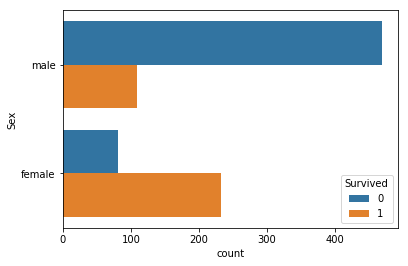

In [131]:
categorical_summarized(train_df, y = 'Sex', hue='Survived', palette=c_palette)

### ==============================================
### FONCTION mode() dans pandas
La fonction mode() retourne la valeur la plus présente dans chaque colonnes

In [132]:
df = pd.DataFrame([[10, 20, 30, 40], [7, 14, 21, 28], [55, 15, 8, 12],
                   [15, 14, 1, 8], [7, 1, 1, 8], [5, 4, 9, 2]],
                  columns=['Apple', 'Orange', 'Banana', 'Pear'],
                  index=['Basket1', 'Basket2', 'Basket3', 'Basket4',
                         'Basket5', 'Basket6'])
 
print("\n------------- Dataframe -------------\n")
print(df)   
    
print("\n----------- Calculate Mean -----------\n")
print(df.mean())
 
print("\n----------- Calculate Median -----------\n")
print(df.median())
 
print("\n----------- Calculate Mode -----------")
print("Affiche les valeurs les plus fréquentes") 
print("        dans chaque colonnes          \n")
print(df.mode())


------------- Dataframe -------------

         Apple  Orange  Banana  Pear
Basket1     10      20      30    40
Basket2      7      14      21    28
Basket3     55      15       8    12
Basket4     15      14       1     8
Basket5      7       1       1     8
Basket6      5       4       9     2

----------- Calculate Mean -----------

Apple     16.500000
Orange    11.333333
Banana    11.666667
Pear      16.333333
dtype: float64

----------- Calculate Median -----------

Apple      8.5
Orange    14.0
Banana     8.5
Pear      10.0
dtype: float64

----------- Calculate Mode -----------
Affiche les valeurs les plus fréquentes
        dans chaque colonnes          

   Apple  Orange  Banana  Pear
0      7      14       1     8


### ==============================================

### b) SANS LA FONCTION categorical_summarized (Step by step)


----------------- Describe ----------------

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

------------------- Mode ------------------

mode:  0    male
dtype: object

------------- Valeurs totales -------------

nombre de valeurs totales :  891

--------------- Distribution --------------

male      577
female    314
Name: Sex, dtype: int64

------------- % Distribution --------------

male      0.647587
female    0.352413
Name: Sex, dtype: float64

-------- Distribution de 'Survived' -------
----------- en fonction de 'Sex' ----------



Text(0.5,1,"Distribution de 'Survived' en fonction de 'Sex'")

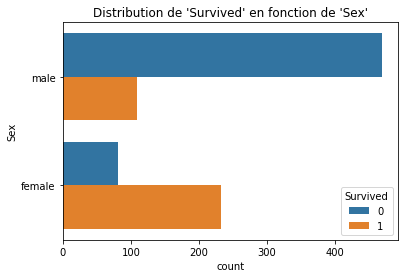

In [133]:
##########################################################
########################     1     #######################
##########################################################
# Afficher les infos statistiques de la colonne 'Sex'
print("\n----------------- Describe ----------------\n")
print (train_df['Sex'].describe())

##########################################################
########################     2     #######################
##########################################################
# Retourner la valeur la plus présente dans chaque colonnes
# Dans ce cas c'est male dans 'Sex'
print("\n------------------- Mode ------------------\n")
print ('mode: ', train_df['Sex'].mode())

##########################################################
########################     3     #######################
##########################################################
# Afficher le nombre de valeurs totales de la colonne "Sex"
print("\n------------- Valeurs totales -------------\n")
print ('nombre de valeurs totales : ', train_df['Sex'].count())

##########################################################
########################     4     #######################
##########################################################
# Afficher la distribution de la colonne "Sex"
print("\n--------------- Distribution --------------\n")
print (train_df['Sex'].value_counts())

##########################################################
########################     5     #######################
##########################################################
# Afficher le % de la distribution dans la colonne "Sex" par rapport au nombre total de ligne
# len() affiche toutes les valeurs
print("\n------------- % Distribution --------------\n")
print (train_df['Sex'].value_counts()/len(train_df))

##########################################################
########################     6     #######################
##########################################################
# Afficher le graph des données de la colonne 'Sex' (y=) en fonction de 'Survived' (hue=) 
# Utiliser la palette 'c_palette' définie plus haut
# Affichage défini sur y
# Pour un affichage sur x => x = 'Sex'
print("\n-------- Distribution de 'Survived' -------")
print("----------- en fonction de 'Sex' ----------\n")
sns.countplot(y='Sex', hue='Survived', data=train_df,
                  palette=c_palette)
plt.title("Distribution de 'Survived' en fonction de 'Sex'")

## C) Target Variable : 'Embarked'

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
mode:  0    S
dtype: object
S    644
C    168
Q     77
Name: Embarked, dtype: int64


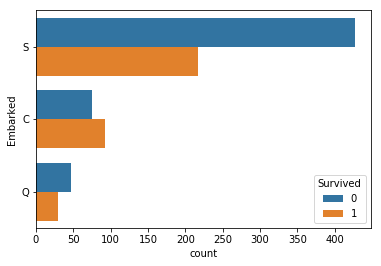

In [134]:
c_palette3 = ['tab:blue', 'tab:orange', 'tab:green']
categorical_summarized(train_df, y = 'Embarked', palette=c_palette3, hue = 'Survived')


----------------- Describe ----------------

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

------------------- Mode ------------------

mode:  0    S
dtype: object

------------- Valeurs totales -------------

nombre de valeurs totales :  889

--------------- Distribution --------------

male      577
female    314
Name: Sex, dtype: int64

------------- % Distribution --------------

S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

-------- Distribution de 'Embarked' -------
----------- en fonction de 'Survived' ----------



Text(0.5,1,"Distribution de 'Embarked' en fonction de 'Survived'")

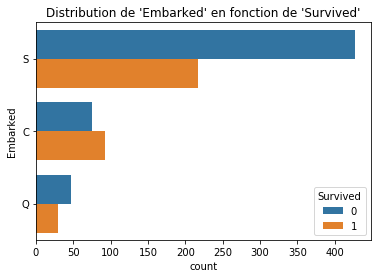

In [135]:
##########################################################
########################     1     #######################
##########################################################
# Afficher les infos statistiques de la colonne 'Embarked'
print("\n----------------- Describe ----------------\n")
print (train_df['Embarked'].describe())

##########################################################
########################     2     #######################
##########################################################
# Retourner la valeur la plus présente dans chaque colonnes
# Dans ce cas c'est male dans 'Embarked'
print("\n------------------- Mode ------------------\n")
print ('mode: ', train_df['Embarked'].mode())

##########################################################
########################     3     #######################
##########################################################
# Afficher le nombre de valeurs totales de la colonne "Embarked"
print("\n------------- Valeurs totales -------------\n")
print ('nombre de valeurs totales : ', train_df['Embarked'].count())

##########################################################
########################     4     #######################
##########################################################
# Afficher la distribution de la colonne "Embarked"
print("\n--------------- Distribution --------------\n")
print (train_df['Sex'].value_counts())

##########################################################
########################     5     #######################
##########################################################
# Afficher le % de la distribution dans la colonne "Embarked" par rapport au nombre total de ligne
# len() affiche toutes les valeurs
print("\n------------- % Distribution --------------\n")
print (train_df['Embarked'].value_counts()/len(train_df))

##########################################################
########################     6     #######################
##########################################################
# Afficher le graph des données de la colonne 'Sex' (y=) en fonction de 'Survived' (hue=) 
# Utiliser la palette 'c_palette' définie plus haut
# Affichage défini sur y
# Pour un affichage sur x => x = 'Embarked'
print("\n-------- Distribution de 'Embarked' -------")
print("----------- en fonction de 'Survived' ----------\n")
sns.countplot(y='Embarked', hue='Survived', data=train_df,
                  palette=c_palette)
plt.title("Distribution de 'Embarked' en fonction de 'Survived'")

# 2. ANALYSE QUANTITATIVE

## A) ANALYSE UNIVARIÉE
Analyse d'une variable => Target Variable : 'Survived'
### Target Variable : 'Age'

### a) AVEC LA FONCTION quantitative_summarized

In [136]:
# Importer la librairie SciPy 
from scipy import stats
from scipy.stats import norm

def quantitative_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, order=None, verbose=True, swarm=False):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed
    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = dataframe[y]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.boxplot(x=x, y=y, hue=hue, data=dataframe,
                palette=palette, order=order, ax=ax)

    if swarm:
        sns.swarmplot(x=x, y=y, hue=hue, data=dataframe,
                      palette=palette, order=order, ax=ax)

    plt.show()


if __name__ == "__main__":
    pass

In [137]:
c_palette = ['tab:blue', 'tab:orange']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
mode:  0    24.0
dtype: float64


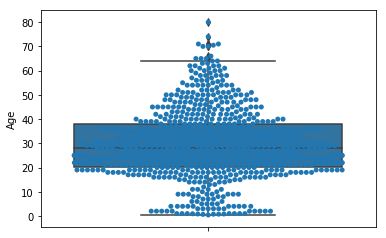

In [138]:
# univariate analysis
quantitative_summarized(dataframe= train_df, y = 'Age', palette=c_palette, verbose=False, swarm=True)

### b) SANS LA FONCTION quantitative_summarized


----------------- Describe ----------------

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

----- 10 valeurs les plus fréquentes ------

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
28.0    25
21.0    24
25.0    23
36.0    22
29.0    20
Name: Age, dtype: int64

------------------- Mode ------------------
--------- Valeur la plus présente ---------

mode:  0    24.0
dtype: float64

------------- Valeurs totales -------------

nombre de valeurs totales :  714

----------- Premières valeurs -------------

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

-------------- Boxplot de 'Age' --------------
En ajoutant le points en dehors de la Boxplot (swarmplot())



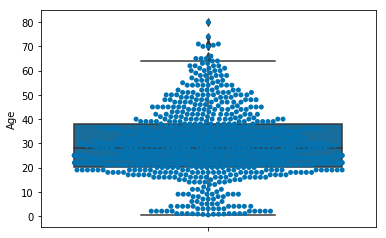

In [139]:
##########################################################
########################     1     #######################
##########################################################
# Afficher les infos statistiques de la colonne 'Age'
print("\n----------------- Describe ----------------\n")
print (train_df['Age'].describe())

##########################################################
########################     2     #######################
##########################################################
# Afficher les (10) valeurs les plus fréquentes dans la feature 'Age'
print("\n----- 10 valeurs les plus fréquentes ------\n")
print (train_df['Age'].value_counts().head(10))

##########################################################
########################     3     #######################
##########################################################
# Retourner la valeur la plus présente dans chaque colonnes
print("\n------------------- Mode ------------------")
print("--------- Valeur la plus présente ---------\n")
print ('mode: ', train_df['Age'].mode())

##########################################################
########################     4     #######################
##########################################################
# Afficher le nombre de valeurs totales de la colonne "Age"
print("\n------------- Valeurs totales -------------\n")
print ('nombre de valeurs totales : ', train_df['Age'].count())

##########################################################
########################     5     #######################
##########################################################
# Afficher la distribution de la colonne "Age"
print("\n----------- Premières valeurs -------------\n")
print (train_df['Age'].head())

##########################################################
########################     6     #######################
##########################################################
# Afficher le BOX PLOT des données de la colonne 'Age' (y=) 
print("\n-------------- Boxplot de 'Age' --------------")
print("En ajoutant le points en dehors de la Boxplot (swarmplot())\n")
sns.boxplot(y='Age', data=train_df,
                palette='colorblind', ax=None, order=None) 
# Ajouter swarmplot
# Draw a categorical scatterplot with non-overlapping points.
sns.swarmplot(y='Age', data=train_df,
                palette='colorblind', ax=None, order=None)
    

## B) ANALYSE BIVARIÉE

Target Variable : 'Age'

### a) AVEC LA FONCTION quantitative_summarized

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
mode:  0    24.0
dtype: float64


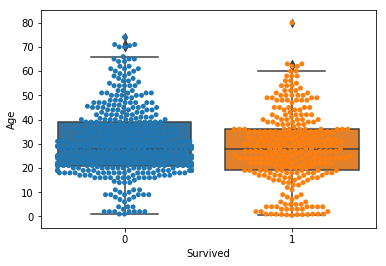

In [140]:
# bivariate analysis with target variable
quantitative_summarized(dataframe= train_df, y = 'Age', x = 'Survived', palette=c_palette, verbose=False, swarm=True)

### b) SANS LA FONCTION quantitative_summarized


----------------- Describe ----------------

              Age    Survived
count  714.000000  891.000000
mean    29.699118    0.383838
std     14.526497    0.486592
min      0.420000    0.000000
25%     20.125000    0.000000
50%     28.000000    0.000000
75%     38.000000    1.000000
max     80.000000    1.000000

----- 10 valeurs les plus fréquentes ------

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
Name: Age, dtype: int64

------------------- Mode ------------------
--------- Valeur la plus présente ---------

    Age  Survived
0  24.0         0

------------- Valeurs totales -------------

Age         714
Survived    891
dtype: int64

----------- Premières valeurs -------------

    Age  Survived
0  22.0         0
1  38.0         1
2  26.0         1
3  35.0         1
4  35.0         0

-------------- Boxplot de 'Age' --------------
En ajoutant le points en dehors de la Boxplot (swarmplot())



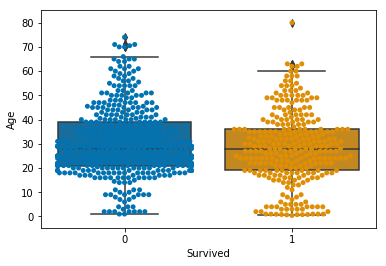

In [141]:
##########################################################
########################     1     #######################
##########################################################
# Afficher les infos statistiques de la colonne 'Age'
print("\n----------------- Describe ----------------\n")
print (train_df[['Age','Survived']].describe())

##########################################################
########################     2     #######################
##########################################################
# Afficher les (10) valeurs les plus fréquentes dans la feature 'Age'
print("\n----- 10 valeurs les plus fréquentes ------\n")
print (train_df['Age'].value_counts().head())

##########################################################
########################     3     #######################
##########################################################
# Retourner la valeur la plus présente dans chaque colonnes
print("\n------------------- Mode ------------------")
print("--------- Valeur la plus présente ---------\n")
print (train_df[['Age','Survived']].mode())

##########################################################
########################     4     #######################
##########################################################
# Afficher le nombre de valeurs totales de la colonne "Age"
print("\n------------- Valeurs totales -------------\n")
print (train_df[['Age','Survived']].count())

##########################################################
########################     5     #######################
##########################################################
# Afficher la distribution de la colonne "Age"
print("\n----------- Premières valeurs -------------\n")
print (train_df[['Age','Survived']].head())

##########################################################
########################     6     #######################
##########################################################
# Afficher le BOX PLOT des données de la colonne 'Sex' (y=) en fonction de 'Survived' (x=) 
print("\n-------------- Boxplot de 'Age' --------------")
print("En ajoutant le points en dehors de la Boxplot (swarmplot())\n")
sns.boxplot(y='Age', x = 'Survived', data=train_df, palette='colorblind', ax=None, order=None) 

# Ajouter swarmplot
# Draw a categorical scatterplot with non-overlapping points.
sns.swarmplot(y='Age', x = 'Survived', data=train_df, palette='colorblind', ax=None, order=None)

## C) ANALYSE MULTIVARIÉE

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
mode:  0    24.0
dtype: float64


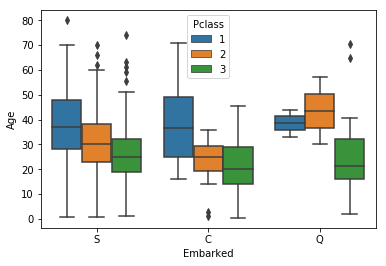

In [142]:
# multivariate analysis with Embarked variable and Pclass variable
quantitative_summarized(dataframe= train_df, y = 'Age', x = 'Embarked', hue = 'Pclass', palette=c_palette3, verbose=False, swarm=False)


----------------- Describe ----------------

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

----- 10 valeurs les plus fréquentes ------

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
Name: Age, dtype: int64

------------------- Mode ------------------
--------- Valeur la plus présente ---------

    Age Embarked
0  24.0        S

------------- Valeurs totales -------------

Age         714
Embarked    889
dtype: int64

----------- Premières valeurs -------------

    Age Embarked
0  22.0        S
1  38.0        C
2  26.0        S
3  35.0        S
4  35.0        S

------------ Boxplot de 'Age' -------------
--------- 'Age' en fonction de ------------
-------- Embarked' et de Pclass -----------



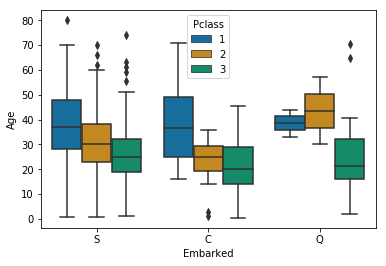

In [143]:
##########################################################
########################     1     #######################
##########################################################
# Afficher les infos statistiques de la colonne 'Age'
# Pas la peine d'afficher les stats de 'Embarked' car c'est une variable catégorielle
print("\n----------------- Describe ----------------\n")
print (train_df['Age'].describe())

##########################################################
########################     2     #######################
##########################################################
# Afficher les (10) valeurs les plus fréquentes dans la feature 'Age'
print("\n----- 10 valeurs les plus fréquentes ------\n")
print (train_df['Age'].value_counts().head())

##########################################################
########################     3     #######################
##########################################################
# Retourner la valeur la plus présente dans chaque colonnes
print("\n------------------- Mode ------------------")
print("--------- Valeur la plus présente ---------\n")
print (train_df[['Age','Embarked']].mode())

##########################################################
########################     4     #######################
##########################################################
# Afficher le nombre de valeurs totales de la colonne "Age"
print("\n------------- Valeurs totales -------------\n")
print (train_df[['Age','Embarked']].count())

##########################################################
########################     5     #######################
##########################################################
# Afficher la distribution de la colonne "Age"
print("\n----------- Premières valeurs -------------\n")
print (train_df[['Age','Embarked']].head())

##########################################################
########################     6     #######################
##########################################################
# Afficher le BOX PLOT des données de la colonne 'Age' (y=) en fonction de 'Embarked' (x=) et de Pclass (hue=)
print("\n------------ Boxplot de 'Age' -------------")
print("--------- 'Age' en fonction de ------------")
print("-------- Embarked' et de Pclass -----------\n")
sns.boxplot(y = 'Age', x = 'Embarked', hue = 'Pclass', data=train_df, palette='colorblind', ax=None, order=None) 

# Ajouter swarmplot
# Draw a categorical scatterplot with non-overlapping points.
# sns.swarmplot(y='Age', x = 'Survived', data=train_df, palette='colorblind', ax=None, order=None)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
mode:  0    24.0
dtype: float64


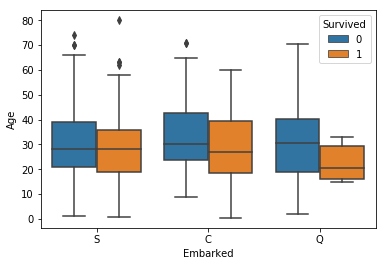

In [144]:
# multivariate analysis with Embarked variable and target variable
quantitative_summarized(dataframe= train_df, y = 'Age', x = 'Embarked', hue = 'Survived', palette=c_palette, verbose=False, swarm=False)


----------------- Describe ----------------

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

----- 10 valeurs les plus fréquentes ------

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
Name: Age, dtype: int64

------------------- Mode ------------------
--------- Valeur la plus présente ---------

    Age Embarked
0  24.0        S

------------- Valeurs totales -------------

Age         714
Embarked    889
dtype: int64

----------- Premières valeurs -------------

    Age Embarked
0  22.0        S
1  38.0        C
2  26.0        S
3  35.0        S
4  35.0        S

------------ Boxplot de 'Age' -------------
--------- 'Age' en fonction de ------------
------- Embarked' et de Survived ----------



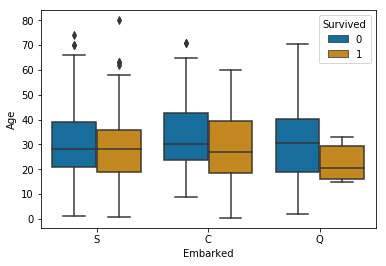

In [145]:
##########################################################
########################     1     #######################
##########################################################
# Afficher les infos statistiques de la colonne 'Age'
# Pas la peine d'afficher les stats de 'Embarked' car c'est une variable catégorielle
print("\n----------------- Describe ----------------\n")
print (train_df['Age'].describe())

##########################################################
########################     2     #######################
##########################################################
# Afficher les (10) valeurs les plus fréquentes dans la feature 'Age'
print("\n----- 10 valeurs les plus fréquentes ------\n")
print (train_df['Age'].value_counts().head())

##########################################################
########################     3     #######################
##########################################################
# Retourner la valeur la plus présente dans chaque colonnes
print("\n------------------- Mode ------------------")
print("--------- Valeur la plus présente ---------\n")
print (train_df[['Age','Embarked']].mode())

##########################################################
########################     4     #######################
##########################################################
# Afficher le nombre de valeurs totales de la colonne "Age"
print("\n------------- Valeurs totales -------------\n")
print (train_df[['Age','Embarked']].count())

##########################################################
########################     5     #######################
##########################################################
# Afficher la distribution de la colonne "Age"
print("\n----------- Premières valeurs -------------\n")
print (train_df[['Age','Embarked']].head())

##########################################################
########################     6     #######################
##########################################################
# Afficher le BOX PLOT des données de la colonne 'Age' (y=) en fonction de 'Embarked' (x=) et de Pclass (hue=)
print("\n------------ Boxplot de 'Age' -------------")
print("--------- 'Age' en fonction de ------------")
print("------- Embarked' et de Survived ----------\n")
sns.boxplot(y = 'Age', x = 'Embarked', hue = 'Survived', data=train_df, palette='colorblind', ax=None, order=None) 

In [146]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    # Afficher le total (sum) des valeurs nulles (isnull)
    # les trier de manière croissante
    total = df.isnull().sum().sort_values(ascending=False)
    
    # Afficher le pourcentage des valeurs nulles
    # Somme des valeurs nulles (df.isnull().sum()) / nombre de valeurs nulles (df.isnull().count())
    # les trier de manière croissante
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    
    # Créer un DataFrame 'missing_data' avec la concatenation de 'total' et 'percent'
    # axis=1 => 'Total' et 'percent' sont affichées en colonnes
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [147]:
draw_missing_data_table(train_df)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


# 3. CLUSTERING

## K Means clustering

In [148]:
# Importer scikit learn
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [167]:
def simple_preprocessing(dataframe, train=True):
    # Create a label (category) encoder object    
    le = LabelEncoder()
    
    # Supprimer les colonnes PassengerId', 'Cabin', 'Name' et 'Ticket'
    # Parce que :
    # 'PassengerId' est simplement une unique identification des passengers
    # 'Cabin' a beaucoup de valeurs nulles
    # 'Ticket number' est juste le numéro de ticket   
    X = dataframe.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)
    
    # Remplacer les valeurs nulles de la colonne X['Age'] 
    # par la valeur la plus fréquente (mode()) dans la colonne (ici c'est 24 => print (train_df['Age'].mode())).
    X['Age'] = X['Age'].fillna(value=X['Age'].mode()[0])
    
    #################################################
    # print("\n----------------- Embarked ----------------\n")
    # print (X['Embarked'].head(50))
    #################################################
    
    # fit() calculates the parameters μ and σ in case of StandardScaler) 
    # and saves them as an internal objects state. 
    # transform() apply the transformation to the DataFrame
    # fit_transform fait les 2 à la fois
    #################################################
    # 1/ le.fit_transform : Encoder les valeurs catégrielles (texte) de la colonne 'Embarked' 
    # en valeurs numériques (C => 0 ; Q => 1 ; S => 2)
    # 2/ fillna : Remplacer les valeurs nulles de la colonne X['Embarked'] 
    # par la valeur la plus fréquente (mode()) dans la colonne. 
    X['Embarked'] = le.fit_transform(X['Embarked'].fillna(value=X['Embarked'].mode()[0]))
    
    #################################################
    # print("\n---------- labelEncoder Embarked ----------\n")
    # print (X['Embarked'].head(50))
    #################################################
    
    # Remplace les lignes ou X['Sex'] == 'male' par 1 et le reste par 0
    X['Sex'] = np.where(X['Sex'] == 'male', 1, 0)
    
    # Condition si l'attribut 'train' est passé à True ou False dans la fonction
    if train:
        # Supprimer la colonne 'Survived' et l'assigner au DataFrame 'x'
        X = X.drop(['Survived'], axis=1)
        # Remplacer les valeur ['Survived'] == 1 par 'Alive' et les autres par 'Dead' 
        # et en faire un Dataframe 'y' avec une seule colonne ?
        y = np.where(dataframe['Survived'] == 1, 'Alive', 'Dead')
        # Convertir les variables catégorielles de 'Survived' en variable numérique
        y = pd.get_dummies(y, columns=['Survived'])
        return X, y
    else:
        return X

===================================================
### EXEMPLE MinMaxScaler()


------------- head de samples -------------

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

------------- head de scaled_df -------------

0    0.271174
1    0.472229
2    0.321438
3    0.434531
4    0.434531
Name: Age, dtype: float64


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


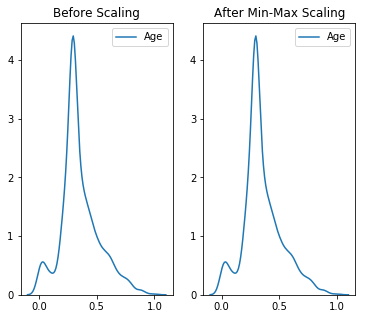

In [162]:
samples_df = pd.DataFrame(samples['Age'])
print("\n------------- head de samples -------------\n")
print (samples_df['Age'].head())


scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(samples_df)
scaled_df = pd.DataFrame(scaled_df, columns=['Age'])

print("\n------------- head de scaled_df -------------\n")
print (scaled_df['Age'].head())

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(scaled_df['Age'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['Age'], ax=ax2)
plt.show()

===================================================

Inertial of clusters:  144.22783109698966


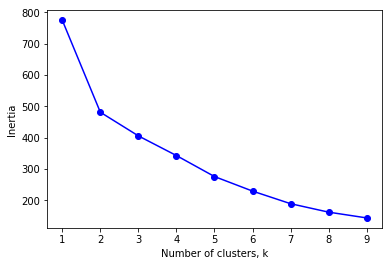

In [151]:
# Afficher le graph d'inertie de k pour trouver le meilleur k
# inertias plot
# good k is a low inertia (how tight the data is in a cluster) and not too high

# Selectionner le Scaler 'MinMaxScaler()'
# Le scaler MinMaxScaler() suit la formule : xi–min(x) / max(x)–min(x)
scaler = preprocessing.MinMaxScaler()
# Autres Scaler possible :
# scaler = preprocessing.RobustScaler()
# scaler = preprocessing.StandardScaler()

# Appliquer les transformations de 'scaler' sur 'samples'
samples = scaler.fit_transform(samples)

# Définir l'intervalle de k (1,10)
ks = range(1,10)
inertias = []

# Faire une boucle sur k pour voir l'inertie en fonction de la valeur de k
for k in ks:
    # 
    k_mean = KMeans(n_clusters=k)
    
    # fit() just calculates the parameters (e.g. μ and σ in case of StandardScaler) 
    # and saves them as an internal objects state. Afterwards, you can call its transform() 
    # method to apply the transformation to a particular set of examples.
    k_mean.fit(samples)
    
    # Append ajoute les rows d'un DataFrame à la fin du DataFrame appelant
    # Retourne un nouvel objet
    inertias.append(k_mean.inertia_)


plt.plot(ks, inertias, '-o', c = 'b')
# plt.title('Inertia Plot')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
print('Inertial of clusters: ', k_mean.inertia_)
plt.show()

In [152]:
# Appliquer la fonction 'simple_preprocessing' au DataFrame 'train_df'
samples = simple_preprocessing(train_df, train = False)

# Selectionner le Scaler 'MinMaxScaler()'
# Le scaler MinMaxScaler() suit la formule : xi–min(x) / max(x)–min(x)
scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.RobustScaler()
# scaler = preprocessing.StandardScaler()

# Définir 'k_mean' comme étant la method 'KMeans' avec un k=2
k_mean = KMeans(n_clusters=2)

# Découper les données en 2 groupes et 4 DataFrames
# avec un découpage de 80/20 : test_size=0.2
# 1/ Un groupe 'sample' à partir du DataFrame 'samples' avec 
# un DataFrame d'entrainement sample_train (80% des valeurs) et 
# un DataFrame de test ? sample_val (20% des valeurs)
# 2/ Un groupe 'gt' (test) à partir du DataFrame train_df['Survived'] (variable 'target') avec
# un DataFrame d'entrainement gt_train (80% des valeurs) et 
# un DataFrame de test ? gt_val (20% des valeurs)
###### En gros quand il y a que la colonne 'target' (gt) c'est le DataFrame de test
sample_train,sample_val, gt_train, gt_val = train_test_split(samples, 
                                                                    train_df['Survived'],
                                                             test_size=0.2, random_state=99)

pipeline = make_pipeline(scaler, k_mean)
# labels = k_mean.predict(samples)
# centroids = k_mean.cluster_centers_
# centroids_x = centroids[:,0]
# centroids_y = centroids[:,1]
pipeline.fit(sample_train)
labels = pipeline.predict(sample_val)
print('Inertial of clusters: ', k_mean.inertia_)

Inertial of clusters:  381.05257210311584


In [153]:
print ('sample : ', samples.shape, ' (100%)')
print ('sample_val : ', sample_val.shape, ' (20%)')
print ('sample_train : ', sample_train.shape, ' (80%)')

sample :  (891, 8)  (100%)
sample_val :  (179, 8)  (20%)
sample_train :  (712, 8)  (80%)


In [154]:
print ('sample : ', samples.shape, ' (100%)')
print ('gt_val : ', gt_val.shape, ' (20%)')
print ('gt_val : ', gt_train.shape, ' (80%)')

sample :  (891, 8)  (100%)
gt_val :  (179,)  (20%)
gt_val :  (712,)  (80%)


In [159]:
ct_df = pd.DataFrame({'labels': labels, 'survived': gt_val})
print (ct_df.head())
# create crosstb
ct = pd.crosstab(ct_df['labels'], ct_df['survived'])
print(ct)

     labels  survived
247       0         1
823       0         1
566       1         0
666       1         0
199       1         0
survived    0   1
labels           
0           1  66
1         112   0


In [68]:
(112 + 57)/179 * 100

94.41340782122904

In [111]:
sample_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 266 to 641
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null int64
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null int64
dtypes: float64(2), int64(6)
memory usage: 50.1 KB


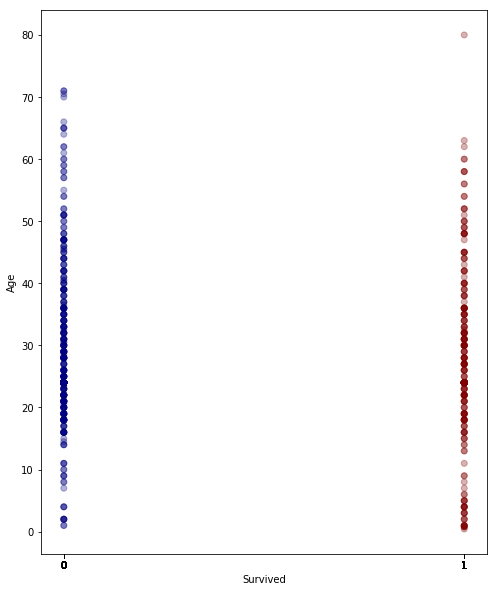

In [112]:
import matplotlib as mpl
fig = plt.figure(figsize = (8,10))
mpl.rcParams['image.cmap'] = 'jet'
labels = pipeline.predict(sample_train)
x_label = 'Survived'
y_label = 'Age'

plt.scatter(sample_train[x_label], sample_train[y_label], c = labels, alpha = 0.3)
plt.xlabel(x_label)
plt.xticks(sample_train[x_label])
plt.ylabel(y_label)
plt.show()

## Hierarchical Clustering

In [160]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [161]:
########################### train_test_split ##############################
# Découper les données en 2 groupes et 4 DataFrames
# avec un découpage de 80/20 : test_size=0.2
# 1/ Un groupe 'sample' à partir du DataFrame 'samples' avec 
#    - un DataFrame d'entrainement sample_train (80% des valeurs) et 
#    - un DataFrame de test ? sample_val (20% des valeurs)
# 2/ Un groupe 'gt' (test) à partir du DataFrame train_df['Survived'] (variable 'target') avec
#    - un DataFrame d'entrainement gt_train (80% des valeurs) et 
#    - un DataFrame de test ? gt_val (20% des valeurs)
###### En gros quand il y a que la colonne 'target' (gt) c'est le DataFrame de test
sample_train,sample_val, gt_train, gt_val = train_test_split(train_df, 
                                                                    train_df['Survived'],
                                                             test_size=0.05, random_state=99)

In [172]:
######################### simple_preprocessing ############################
# 1/ Créer un label encoder object    
# 2/ Supprimer les colonnes PassengerId', 'Cabin', 'Name' et 'Ticket'
# 3/ Remplacer les valeurs nulles de la colonne X['Age'] 
#    par la valeur la plus fréquente (mode()) dans la colonne.
# 4/ le.fit_transform : Encoder les valeurs catégrielles (texte) de la colonne 'Embarked' 
#    en valeurs numériques (C => 0 ; Q => 1 ; S => 2)
# 5/ fillna : Remplacer les valeurs nulles de la colonne X['Embarked'] 
#    par la valeur la plus fréquente (mode()) dans la colonne. 
# 6/ Remplace les lignes ou X['Sex'] == 'male' par 1 et le reste par 0
sample_val_processed = simple_preprocessing(sample_val, train = False)

# print (sample_val_processed.head())

############################### scaler ####################################
# Le scaler MinMaxScaler() suit la formule : xi–min(x) / max(x)–min(x)
# scaler = preprocessing.MinMaxScaler()
sample_val_processed = scaler.fit_transform(sample_val_processed)

In [173]:
################### scipy.cluster.hierarchy.linkage #######################

mergings = linkage(sample_val_processed, method='complete')

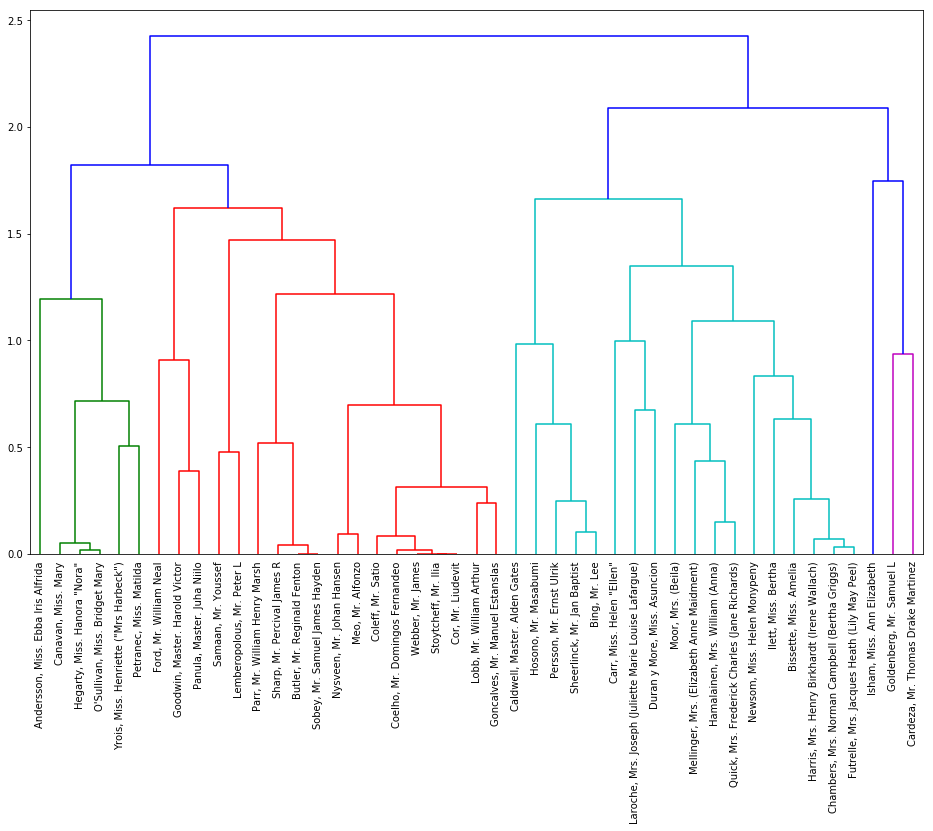

In [174]:
fig = plt.figure(figsize = (16,10))
dendrogram(mergings,
           labels=np.array(sample_val['Name']),
           leaf_rotation=90,
           leaf_font_size=10)
plt.show()